# Permutation Test

In [1]:
suppressPackageStartupMessages({
  library(knitr)
  library(readr)
  library(tidyverse)
})

In [12]:
actors <- read_csv("https://raw.githubusercontent.com/zkdlyn/APM1210_SA2/refs/heads/main/celebrity_sample30.csv",
show_col_types = FALSE)

head(actors,5)


name,years_active,imdb_credits,family,education,politics,wins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sam Milby,20,60,0,0,0,0
Daniel Padilla,15,34,1,0,0,1
Nadine Lustre,24,47,0,1,0,5
Bea Alonzo,23,51,0,1,0,0
Alden Richards,14,55,0,1,0,0


### Objective
Compare the mean number of awards between non-politicians and politicians using permutation testing.

### Hypotheses
- $H_0$: There is no significant difference between the means of the two groups.
- $H_1$: There is a significant difference between the means of the two groups.

In [4]:
table(actors$politics)


 0  1 
18 12 

In this sample, there are 18 non-politicians and 12 politicians.

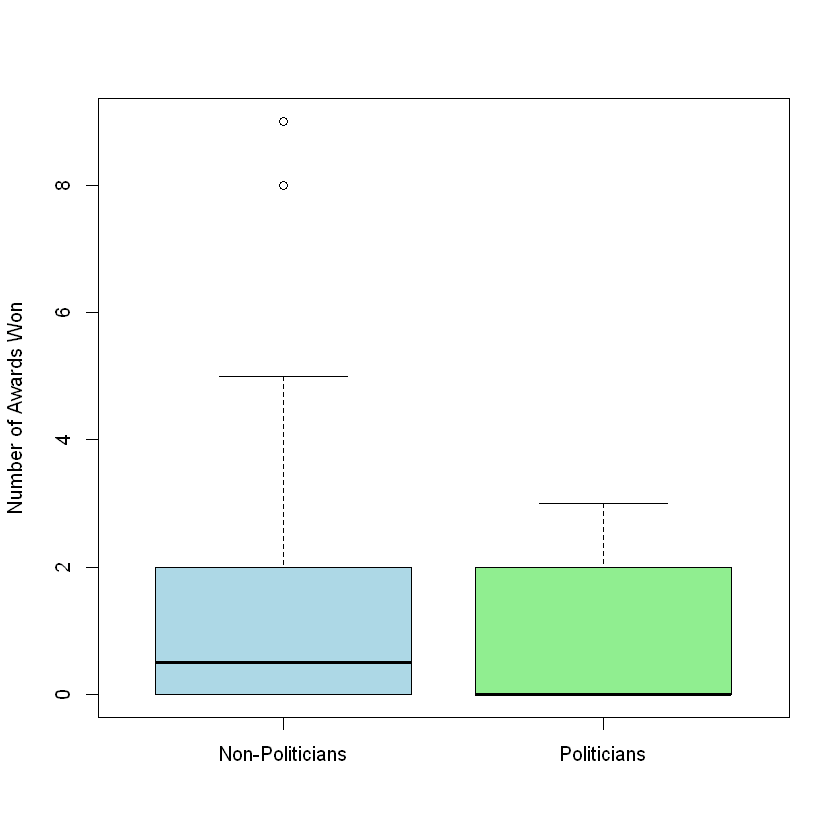

In [5]:
x <- actors$wins[actors$politics ==0] # actors not in politics
y <- actors$wins[actors$politics ==1] # actors in politics

boxplot(x, y,
     names = c("Non-Politicians", "Politicians"),
     ylab = "Number of Awards Won",
     col = c("lightblue", "lightgreen"))

In [34]:
set.seed(1234)
R <- 5000
K <- 1:30
z <- c(x, y) 

diff <- abs(mean(x) - mean(y))
n <- length(actors$politics)

permuted_diffs <- numeric(R)

for (i in 1:R){
    k <- sample(K, size=18, replace = FALSE)
    x1 <- z[k]
    y1 <- z[-k]
    permuted_diffs[i] <- abs(mean(x1) - mean(y1))
}

p <- mean(permuted_diffs >= diff)
p

[1] 0.3726

Since p > 0.05, there is insufficient evidence to reject the null hypothesis. Hence, we conclude that there is no significant difference between the means of the two groups.

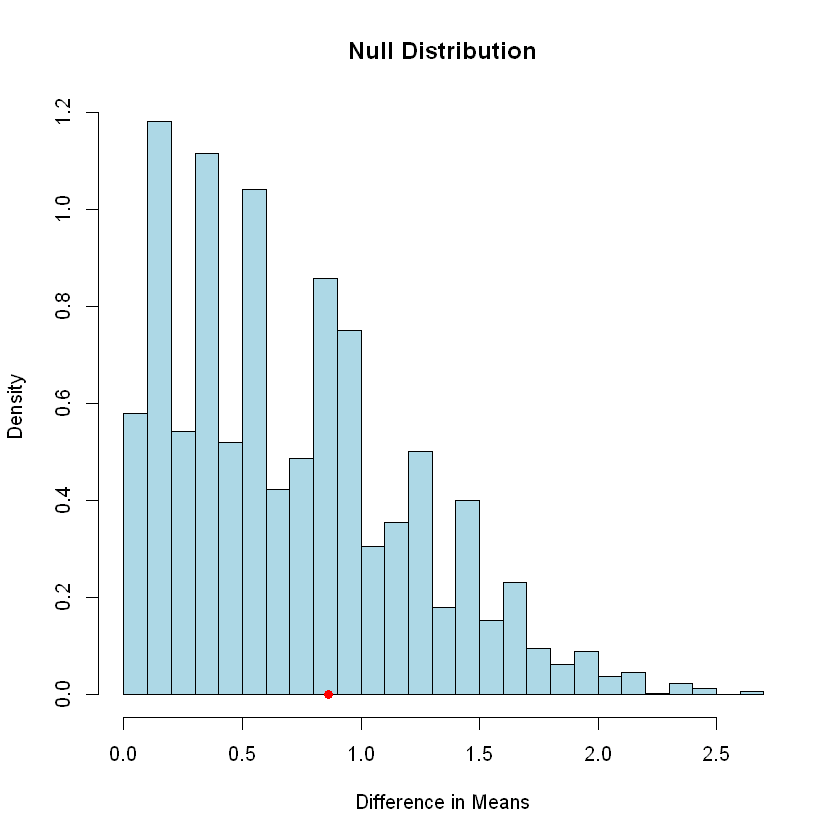

In [37]:
hist(permuted_diffs, breaks="scott", main="Null Distribution",
     freq= FALSE, xlab="Difference in Means", col="lightblue")

points(diff,0, cex=1, pch=16, col="red")

In [30]:
t.test(x, y, var.equal = TRUE)


	Two Sample t-test

data:  x and y
t = 0.98516, df = 28, p-value = 0.333
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9293733  2.6515955
sample estimates:
mean of x mean of y 
1.7777778 0.9166667 
